<a href="https://colab.research.google.com/github/jmora67248-ui/Ciencia-de-datos/blob/main/Actividad2EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introducción al Conjunto de Datos de Enfermedad Cardíaca**
##Este análisis de datos se centra en un conjunto de datos de enfermedades cardiovasculares (ECV), que son la principal causa de muerte a nivel mundial.

##El dataset se descargo de Kaggle, este contiene 918 registros y 12 variables (características) con información médica y demográfica de pacientes, como la Edad, el Sexo, el Tipo de Dolor en el Pecho, los niveles de Colesterol y la Frecuencia Cardíaca Máxima.

# **Pregunta de Investigación Principal**
##La pregunta de investigación central abordada a través del análisis exploratorio (EDA) es:

##**¿Qué indicadores (variables) se relacionan más fuertemente con la presencia de una enfermedad cardíaca (Heart Disease)**

##El objetivo es identificar los factores de riesgo clave que distinguen a los pacientes sanos de los enfermos, utilizando la variable de salida Heart Disease (0 = Sano, 1 = Enfermo) para evaluar la influencia de variables como la edad, el sexo, la glucemia en ayunas y la angina de esfuerzo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files



In [ ]:
# Subir archivo CSV
uploaded = files.upload()
filename = list(uploaded.keys())[0]

# Leer archivo CSV
df  = pd.read_csv(filename)

Saving heart.csv to heart.csv


In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
# --- Verificación de Datos Ausentes ---

print("--- Conteo de Datos Ausentes por Columna ---")
conteo_nulos = df.isnull().sum()
print(conteo_nulos)

print("\n--- Porcentaje de Datos Ausentes por Columna ---")
porcentaje_nulos = (df.isnull().sum() / len(df)) * 100
# Usamos .sort_values() para ver primero las columnas con más nulos
print(porcentaje_nulos.sort_values(ascending=False))

# --- Resumen General ---
total_celdas = df.size
total_nulos = conteo_nulos.sum()
porcentaje_total_nulos = (total_nulos / total_celdas) * 100

print("\n--- Resumen Total ---")
print(f"Total de celdas en el DataFrame: {total_celdas}")
print(f"Total de celdas ausentes (nulas): {total_nulos}")
print(f"Porcentaje total de datos ausentes: {porcentaje_total_nulos:.2f}%")

if total_nulos > 0:
    print("\n¡Alerta! Se encontraron datos ausentes.")
else:
    print("\n¡Excelente! No hay datos ausentes en el DataFrame.")

--- Conteo de Datos Ausentes por Columna ---
Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

--- Porcentaje de Datos Ausentes por Columna ---
Age               0.0
Sex               0.0
ChestPainType     0.0
RestingBP         0.0
Cholesterol       0.0
FastingBS         0.0
RestingECG        0.0
MaxHR             0.0
ExerciseAngina    0.0
Oldpeak           0.0
ST_Slope          0.0
HeartDisease      0.0
dtype: float64

--- Resumen Total ---
Total de celdas en el DataFrame: 11016
Total de celdas ausentes (nulas): 0
Porcentaje total de datos ausentes: 0.00%

¡Excelente! No hay datos ausentes en el DataFrame.


--- Pregunta 1: Proporción de Enfermedad Cardíaca ---
Total de pacientes: 918
Conteo (0=Sano, 1=Enfermo):
 HeartDisease
1    508
0    410
Name: count, dtype: int64

Proporción (0=Sano, 1=Enfermo):
 HeartDisease
1    55.34%
0    44.66%
Name: proportion, dtype: object


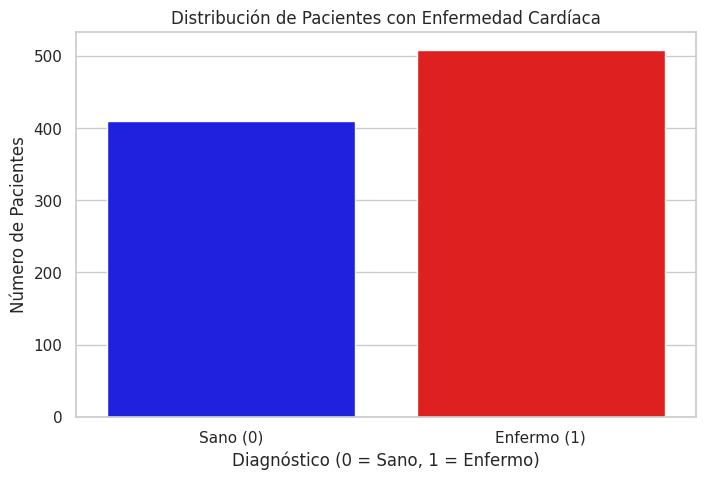

In [ ]:
# -----------------------------------------------------------------
## 1. ¿Proporción de pacientes con enfermedad cardíaca?
# -----------------------------------------------------------------
# --- Configuración Visual ---
# Establecer un tema visual para los gráficos
sns.set_theme(style="whitegrid")
palette_enfermedad = {0: "blue", 1: "red"} # 0=Sano, 1=Enfermo



print("--- Pregunta 1: Proporción de Enfermedad Cardíaca ---")
total_pacientes = df.shape[0]
conteo_enfermedad = df['HeartDisease'].value_counts()
proporcion_enfermedad = df['HeartDisease'].value_counts(normalize=True)

print(f"Total de pacientes: {total_pacientes}")
print("Conteo (0=Sano, 1=Enfermo):\n", conteo_enfermedad)
print("\nProporción (0=Sano, 1=Enfermo):\n", proporcion_enfermedad.apply(lambda x: f"{x:.2%}"))

# Gráfico
plt.figure(figsize=(8, 5))
# CORRECCIÓN: Asignamos x='HeartDisease' a hue y quitamos la leyenda
sns.countplot(data=df, x='HeartDisease', hue='HeartDisease',
              palette=palette_enfermedad, legend=False) ## <-- CORREGIDO
plt.title('Distribución de Pacientes con Enfermedad Cardíaca')
plt.xlabel('Diagnóstico (0 = Sano, 1 = Enfermo)')
plt.ylabel('Número de Pacientes')
plt.xticks([0, 1], ['Sano (0)', 'Enfermo (1)'])
plt.show()


--- Pregunta 2: Distribución de Edad ---
Estadísticas descriptivas de Edad:
count    918.000000
mean      53.510893
std        9.432617
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: Age, dtype: float64


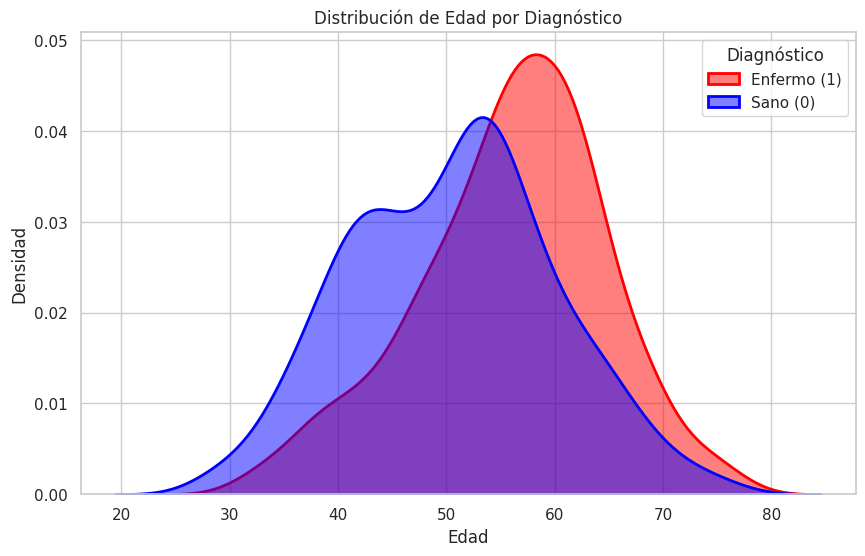

In [ ]:
# -----------------------------------------------------------------
## 2. ¿Distribución de edad general y por diagnóstico?
# -----------------------------------------------------------------
print("\n--- Pregunta 2: Distribución de Edad ---")
print("Estadísticas descriptivas de Edad:")
print(df['Age'].describe())

# Gráfico de densidad (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='HeartDisease',
            fill=True, common_norm=False, palette=palette_enfermedad,
            alpha=0.5, linewidth=2)
plt.title('Distribución de Edad por Diagnóstico')
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.legend(title='Diagnóstico', labels=['Enfermo (1)', 'Sano (0)'])
plt.show()

apartir de los 55 años la densidad de pacientes enfermos sobre pasa la de pacientes sanos.


--- Pregunta 3: Tasa de Enfermedad por Sexo ---
Tasa media de enfermedad por sexo:
Sex
F    25.91%
M    63.17%
Name: HeartDisease, dtype: object


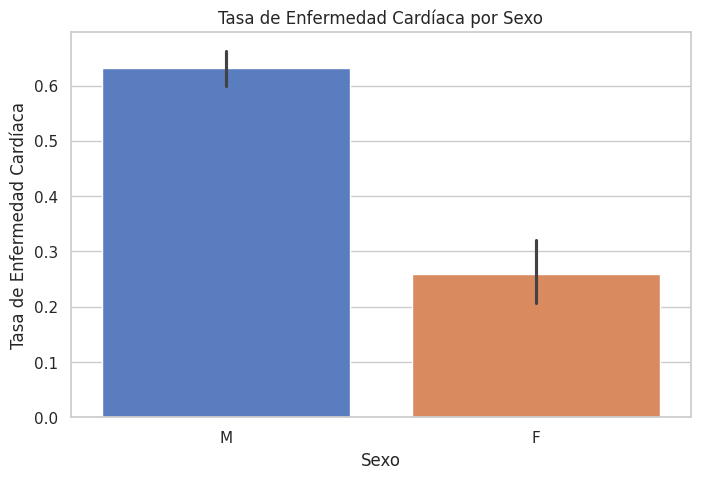

In [ ]:
# -----------------------------------------------------------------
## 3. ¿Diferencias en tasa de enfermedad por sexo?
# -----------------------------------------------------------------
print("\n--- Pregunta 3: Tasa de Enfermedad por Sexo ---")
tasa_por_sexo = df.groupby('Sex')['HeartDisease'].mean()
print("Tasa media de enfermedad por sexo:")
print(tasa_por_sexo.apply(lambda x: f"{x:.2%}"))

# Gráfico
plt.figure(figsize=(8, 5))
# CORRECCIÓN: Asignamos x='Sex' a hue y quitamos la leyenda
sns.barplot(data=df, x='Sex', y='HeartDisease', hue='Sex',
            palette='muted', legend=False)
plt.title('Tasa de Enfermedad Cardíaca por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Tasa de Enfermedad Cardíaca')
plt.show()


--- Pregunta 4: Tipo de Dolor de Pecho (ChestPainType) ---
Tasa media de enfermedad por tipo de dolor:
ChestPainType
ASY    79.03%
TA     43.48%
NAP    35.47%
ATA    13.87%
Name: HeartDisease, dtype: object

Nota: 'ASY' (Asintomático) parece ser el indicador más fuerte.


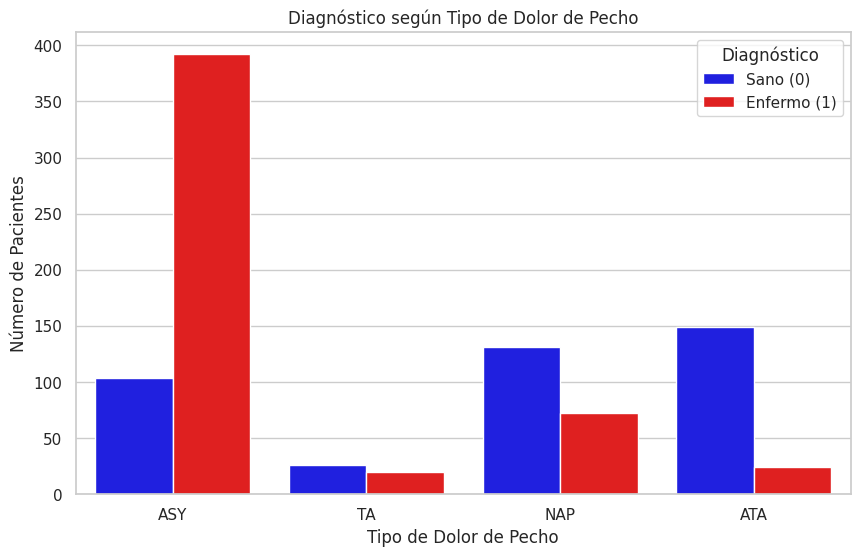

In [ ]:
# -----------------------------------------------------------------
## 4. ¿Tipo de dolor de pecho vs. enfermedad cardíaca?
# -----------------------------------------------------------------
print("\n--- Pregunta 4: Tipo de Dolor de Pecho (ChestPainType) ---")
tasa_por_dolor = df.groupby('ChestPainType')['HeartDisease'].mean().sort_values(ascending=False)
print("Tasa media de enfermedad por tipo de dolor:")
print(tasa_por_dolor.apply(lambda x: f"{x:.2%}"))
print("\nNota: 'ASY' (Asintomático) parece ser el indicador más fuerte.")

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease',
              palette=palette_enfermedad, order=tasa_por_dolor.index)
plt.title('Diagnóstico según Tipo de Dolor de Pecho')
plt.xlabel('Tipo de Dolor de Pecho')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico', labels=['Sano (0)', 'Enfermo (1)'])
plt.show()

El tipo de  dolor en el pecho qye tiene mas correlación con pacientes enfermos es el tipo ASY


--- Pregunta 5: Colesterol y Presión Arterial ---
Número de pacientes con Colesterol = 0: 172


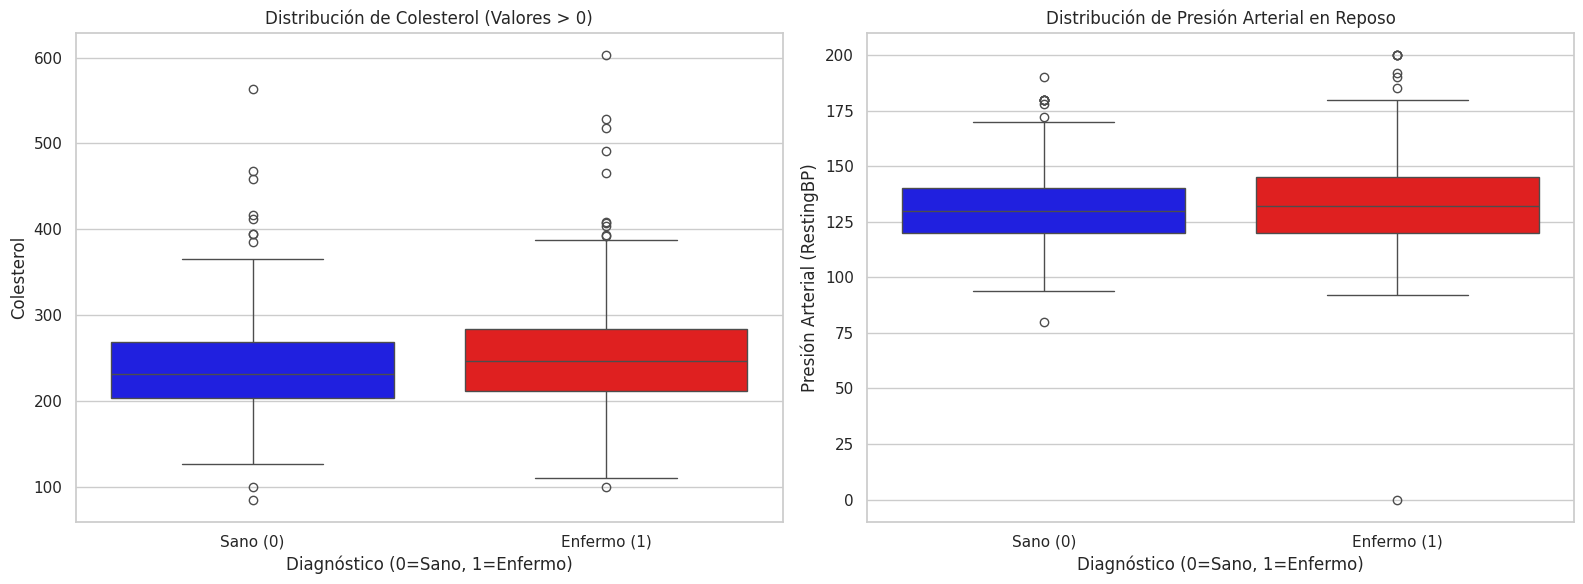

In [ ]:
# -----------------------------------------------------------------
## 5. ¿Niveles de Colesterol y Presión (RestingBP) vs. enfermedad?
# -----------------------------------------------------------------
print("\n--- Pregunta 5: Colesterol y Presión Arterial ---")

# Nota: El dataset tiene valores de 'Cholesterol' en 0, que son
# fisiológicamente imposibles. Podrían ser datos faltantes.
chol_zeros = (df['Cholesterol'] == 0).sum()
print(f"Número de pacientes con Colesterol = 0: {chol_zeros}")

# Crear un DataFrame sin los ceros de colesterol para el gráfico
df_no_zero_chol = df[df['Cholesterol'] > 0]

# Gráficos (Boxplot)
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Colesterol (filtrado)
# CORRECCIÓN: Asignamos x='HeartDisease' a hue y quitamos la leyenda
sns.boxplot(ax=axes[0], data=df_no_zero_chol, x='HeartDisease', y='Cholesterol',
            hue='HeartDisease', palette=palette_enfermedad, legend=False)
axes[0].set_title('Distribución de Colesterol (Valores > 0)')
axes[0].set_xlabel('Diagnóstico (0=Sano, 1=Enfermo)')
axes[0].set_ylabel('Colesterol')
axes[0].set_xticks([0, 1], ['Sano (0)', 'Enfermo (1)'])

# Presión Arterial en Reposo
# CORRECCIÓN: Asignamos x='HeartDisease' a hue y quitamos la leyenda
sns.boxplot(ax=axes[1], data=df, x='HeartDisease', y='RestingBP',
            hue='HeartDisease', palette=palette_enfermedad, legend=False)
axes[1].set_title('Distribución de Presión Arterial en Reposo')
axes[1].set_xlabel('Diagnóstico (0=Sano, 1=Enfermo)')
axes[1].set_ylabel('Presión Arterial (RestingBP)')
axes[1].set_xticks([0, 1], ['Sano (0)', 'Enfermo (1)'])

plt.tight_layout()
plt.show()

## Mientras que el colesterol muestra una asociación visible (niveles más altos en enfermos), la presión arterial en reposo no muestra una distinción clara entre los dos grupos en este análisis.


--- Pregunta 6: Azúcar en Sangre en Ayunas (FastingBS) ---
Tasa de enfermedad por azúcar en sangre (0=Normal, 1=>120 mg/dl):
FastingBS
0    48.01%
1    79.44%
Name: HeartDisease, dtype: object


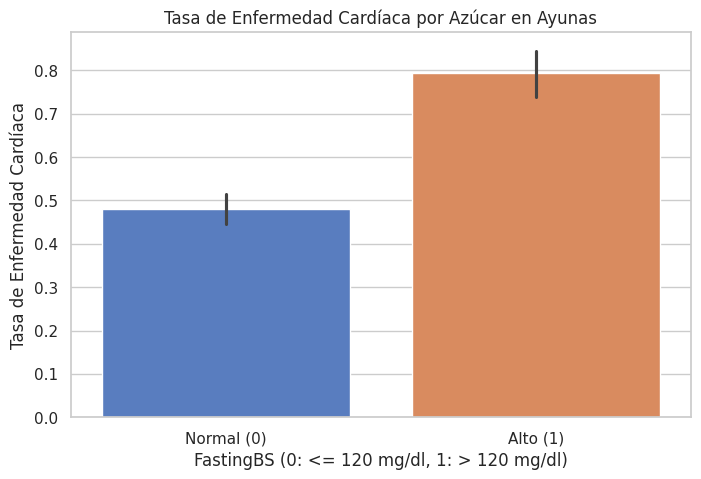

In [ ]:
# -----------------------------------------------------------------
## 6. ¿Azúcar en sangre (FastingBS) vs. enfermedad?
# -----------------------------------------------------------------
print("\n--- Pregunta 6: Azúcar en Sangre en Ayunas (FastingBS) ---")
tasa_por_azucar = df.groupby('FastingBS')['HeartDisease'].mean()
print("Tasa de enfermedad por azúcar en sangre (0=Normal, 1=>120 mg/dl):")
print(tasa_por_azucar.apply(lambda x: f"{x:.2%}"))

# Gráfico
plt.figure(figsize=(8, 5))
# CORRECCIÓN: Asignamos x='FastingBS' a hue y quitamos la leyenda
sns.barplot(data=df, x='FastingBS', y='HeartDisease', hue='FastingBS',
            palette='muted', legend=False)
plt.title('Tasa de Enfermedad Cardíaca por Azúcar en Ayunas')
plt.xlabel('FastingBS (0: <= 120 mg/dl, 1: > 120 mg/dl)')
plt.ylabel('Tasa de Enfermedad Cardíaca')
plt.xticks([0, 1], ['Normal (0)', 'Alto (1)'])
plt.show()

## Las personas que tienen azucar alta (1) la sangre, tienen un mayor tasa de enfermedad cardiaca


--- Pregunta 7: Variables de Ejercicio ---
Tasa de enfermedad por angina inducida por ejercicio:
ExerciseAngina
N    35.10%
Y    85.18%
Name: HeartDisease, dtype: object


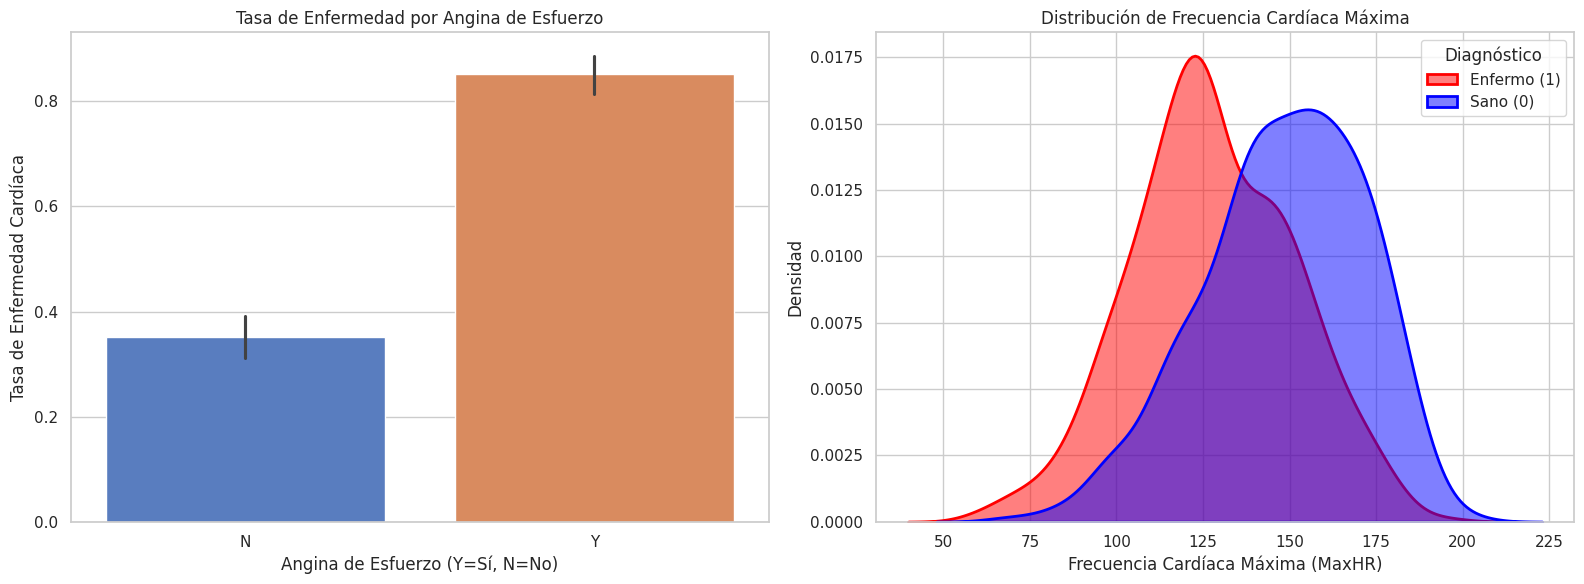

In [ ]:
# -----------------------------------------------------------------
## 7. ¿Variables de ejercicio (Angina y MaxHR) vs. enfermedad?
# -----------------------------------------------------------------
print("\n--- Pregunta 7: Variables de Ejercicio ---")

# Angina inducida por ejercicio
tasa_por_angina = df.groupby('ExerciseAngina')['HeartDisease'].mean()
print("Tasa de enfermedad por angina inducida por ejercicio:")
print(tasa_por_angina.apply(lambda x: f"{x:.2%}"))

# Gráficos
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Tasa por Angina
# CORRECCIÓN: Asignamos x='ExerciseAngina' a hue y quitamos la leyenda
sns.barplot(ax=axes[0], data=df, x='ExerciseAngina', y='HeartDisease',
            hue='ExerciseAngina', palette='muted', legend=False)
axes[0].set_title('Tasa de Enfermedad por Angina de Esfuerzo')
axes[0].set_xlabel('Angina de Esfuerzo (Y=Sí, N=No)')
axes[0].set_ylabel('Tasa de Enfermedad Cardíaca')

# Distribución de Frecuencia Cardíaca Máxima (MaxHR)
sns.kdeplot(ax=axes[1], data=df, x='MaxHR', hue='HeartDisease',
            fill=True, common_norm=False, palette=palette_enfermedad,
            alpha=0.5, linewidth=2)
axes[1].set_title('Distribución de Frecuencia Cardíaca Máxima')
axes[1].set_xlabel('Frecuencia Cardíaca Máxima (MaxHR)')
axes[1].set_ylabel('Densidad')
axes[1].legend(title='Diagnóstico', labels=['Enfermo (1)', 'Sano (0)'])

plt.tight_layout()
plt.show()

## La Angina por Ejercicio es un Fuerte Predicto, los pacientes que reportan angina inducida por ejercicio ('Y') tienen una tasa de enfermedad cardíaca altísima (cercana al 90%).


## El gráfico de densidad muestra una clara separación. Los pacientes sanos (azul) tienden a alcanzar una frecuencia cardíaca máxima (MaxHR) más alta (pico ~150-160 bpm) que los pacientes enfermos (rojo) (pico ~120-130 bpm).



#


--- Pregunta 8: Pendiente del Segmento ST (ST_Slope) ---
Tasa de enfermedad por pendiente ST:
ST_Slope
Flat    82.83%
Down    77.78%
Up      19.75%
Name: HeartDisease, dtype: object


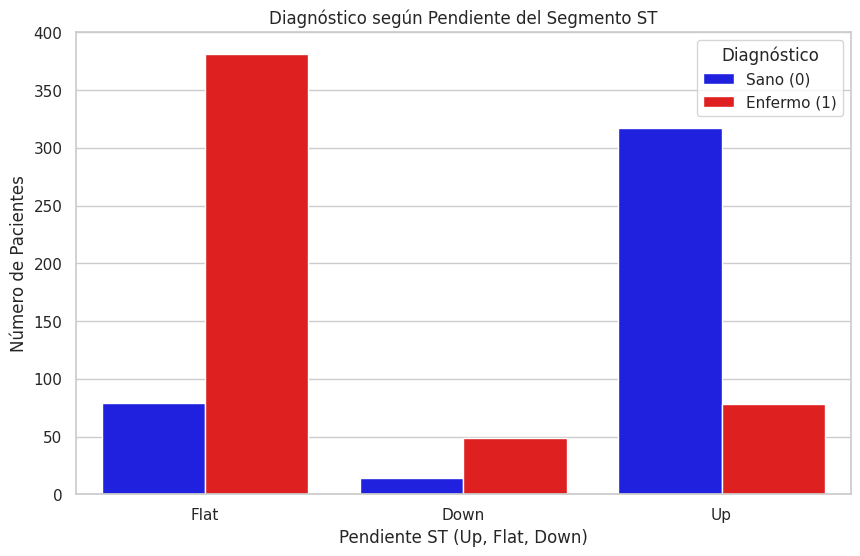

In [ ]:
# -----------------------------------------------------------------
## 8. ¿Pendiente ST (ST_Slope) vs. enfermedad?
# -----------------------------------------------------------------
print("\n--- Pregunta 8: Pendiente del Segmento ST (ST_Slope) ---")
tasa_por_slope = df.groupby('ST_Slope')['HeartDisease'].mean().sort_values(ascending=False)
print("Tasa de enfermedad por pendiente ST:")
print(tasa_por_slope.apply(lambda x: f"{x:.2%}"))

# Gráfico
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease',
              palette=palette_enfermedad, order=tasa_por_slope.index)
plt.title('Diagnóstico según Pendiente del Segmento ST')
plt.xlabel('Pendiente ST (Up, Flat, Down)')
plt.ylabel('Número de Pacientes')
plt.legend(title='Diagnóstico', labels=['Sano (0)', 'Enfermo (1)'])
plt.show()

## Se puede observar que una (pendiende de segmento St flat) se relaciona fuertemente con un paciente enfermo, mientras que una pendiente ST UP se relaciona con pacientes sanos


--- Pregunta 9: Matriz de Correlación Numérica ---
Matriz de Correlación:
                   Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  0.235792  0.050148   
MaxHR        -0.382045  -0.112135     0.235792  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000  


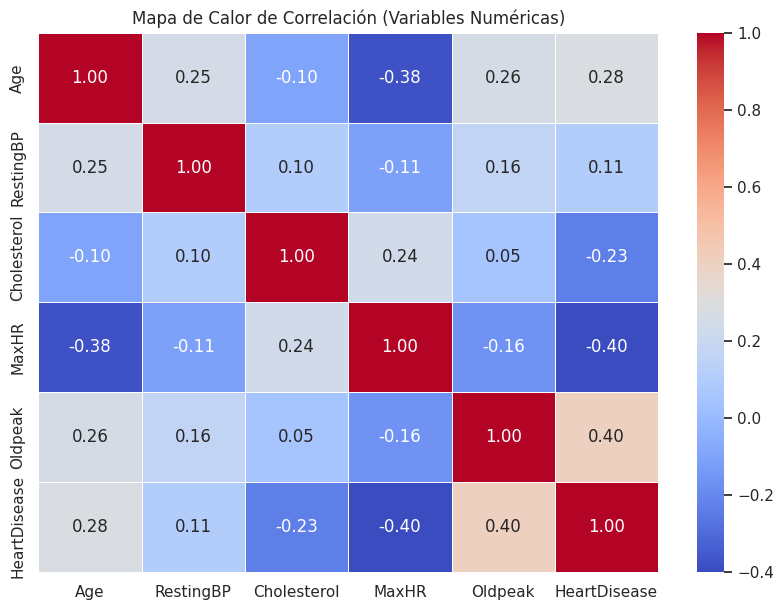

In [ ]:
# -----------------------------------------------------------------
## 9. ¿Correlación entre variables numéricas?
# -----------------------------------------------------------------
print("\n--- Pregunta 9: Matriz de Correlación Numérica ---")

# Seleccionamos las variables numéricas continuas/clave
# Incluimos HeartDisease para ver su correlación con las demás
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'HeartDisease']
correlation_matrix = df[numeric_cols].corr()

print("Matriz de Correlación:")
print(correlation_matrix)

# Gráfico (Mapa de Calor)
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de Correlación (Variables Numéricas)')
plt.show()

## Entre las relaciones numericas respecto a heartDisease observamos que

* ## maxHR, se relacion inversamente a la enfermedad, como lo pudimos observar en graficas anteriores

* ## oldpeak se relaciona directamente con la enfermedad


--- Pregunta 10: Interacción Edad, Sexo y Enfermedad ---
Mostrando gráfico de regresión logística...


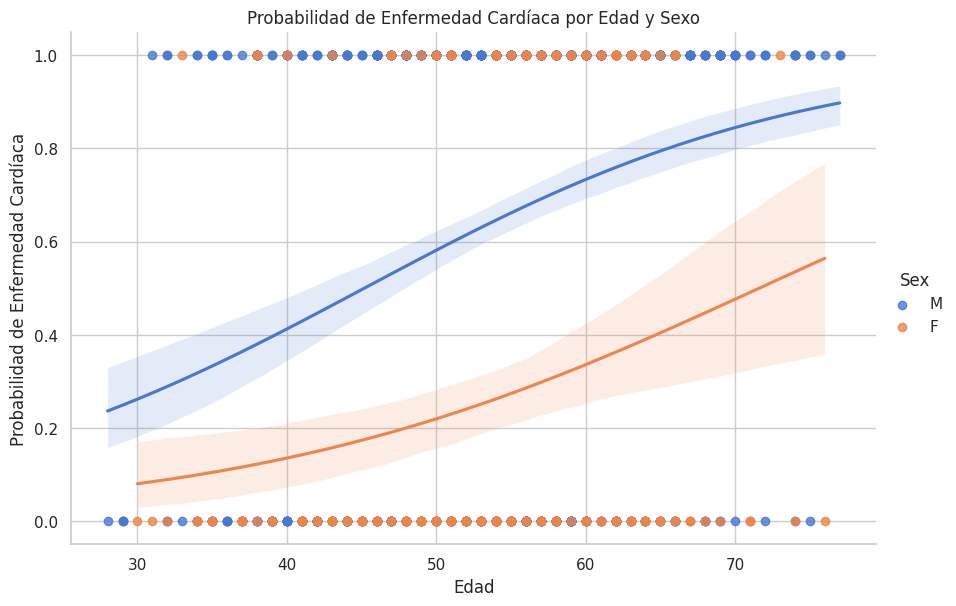


--- Fin del Análisis EDA ---


In [ ]:
# -----------------------------------------------------------------
## 10. ¿Interacción de Edad y Sexo vs. enfermedad?
# -----------------------------------------------------------------
print("\n--- Pregunta 10: Interacción Edad, Sexo y Enfermedad ---")
print("Mostrando gráfico de regresión logística...")

# Un lmplot con 'logistic=True' es ideal para ver la probabilidad
sns.lmplot(data=df, x='Age', y='HeartDisease', hue='Sex',
           logistic=True, height=6, aspect=1.5, palette='muted')
plt.title('Probabilidad de Enfermedad Cardíaca por Edad y Sexo')
plt.xlabel('Edad')
plt.ylabel('Probabilidad de Enfermedad Cardíaca')
plt.show()

print("\n--- Fin del Análisis EDA ---")

* # El gráfico de regresión logística ilustra que la probabilidad de desarrollar enfermedad cardíaca aumenta significativamente con la edad para ambos sexos.

* # Las curvas modeladas predicen una probabilidad consistentemente mayor para los hombres (M) que para las mujeres (F) en todas las edades. A los 70 años, la probabilidad de enfermedad cardíaca para los hombres es de casi el 90%, mientras que para las mujeres es cercana al 60%.

* # Los puntos observados muestran los datos binarios reales (0=No Enfermedad, 1=Sí Enfermedad), y las áreas sombreadas indican el intervalo de confianza de la predicción.